In [1]:
# Imports.
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

tfd = tf.contrib.distributions

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
# Model & Plotting.

neurons = 256

# Encoder.
def make_encoder(data, code_size):
    x = tf.layers.flatten(data)
    h1 = tf.layers.dense(x, neurons, tf.nn.relu)
    h2 = tf.layers.dense(h1, neurons, tf.nn.relu)
    loc = tf.layers.dense(h2, code_size, tf.nn.tanh)
    scl = tf.layers.dense(h2, code_size, tf.nn.softplus)
    return tfd.MultivariateNormalDiag(loc, scl)

# Prior.
def make_prior(code_size):
    loc = tf.zeros(code_size)
    scl = tf.ones(code_size)
    return tfd.MultivariateNormalDiag(loc, scl)

# Decoder
def make_decoder(code, data_shape):
    x = code
    h1 = tf.layers.dense(x, neurons, tf.nn.relu)
    h2 = tf.layers.dense(h1, neurons, tf.nn.relu)
    loc = tf.layers.dense(h2, np.prod(data_shape), tf.nn.softplus)
    scl = tf.layers.dense(h2, np.prod(data_shape), tf.nn.softplus)
    
    return loc, scl

# Optimisation
make_encoder = tf.make_template('encoder', make_encoder)
make_decoder = tf.make_template('decoder', make_decoder)

In [3]:
# Dataset retrieval.
X_train = np.load('FireEvac_train_set.npy')
X_test = np.load('FireEvac_test_set.npy')


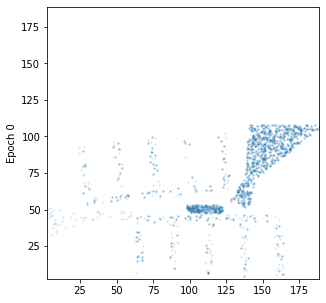

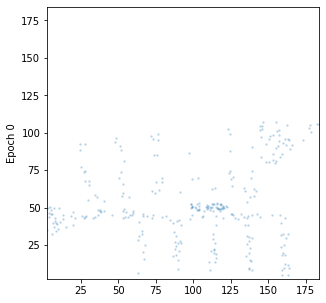

In [4]:
# Plotting.
def plot(epoch, codes, size=2):
    ig, ax = plt.subplots(ncols=1, figsize=(size, size))
    no_ticks = dict(left='off', bottom='off', labelleft='off', labelbottom='off')
    ax.set_ylabel('Epoch {}'.format(epoch))
    ax.scatter(codes[:, 0], codes[:, 1], s=2, alpha=0.1)
    ax.set_aspect('equal')
    ax.set_xlim(codes.min() - .1, codes.max() + .1)
    ax.set_ylim(codes.min() - .1, codes.max() + .1)
    ax.tick_params(axis='both', which='both', **no_ticks)
    plt.show()
    
plot(0, X_train, size=5)
plot(0, X_test, size=5)

In [5]:
data = tf.placeholder(tf.float32, [None, 2])

cs = 1000

# Define the model.
prior = make_prior(code_size=cs)
posterior = make_encoder(data, code_size=cs)
code = posterior.sample()

# Define the loss.
loc, scl = make_decoder(code, [2])

mvn = tfd.Independent(tfd.MultivariateNormalDiag(loc, scl))
likelihood = mvn.log_prob(data)

divergence = tfd.kl_divergence(posterior, prior)
elbo = tf.reduce_mean(likelihood - .5*divergence)
optimize = tf.train.AdamOptimizer(0.001).minimize(-elbo)

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlo

Epoch 0 elbo -718236.56


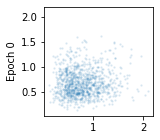

Reconstruction:


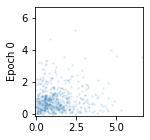

Epoch 1 elbo -20.952852


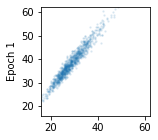

Reconstruction:


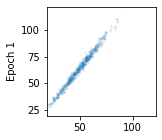

Epoch 2 elbo -12.742695


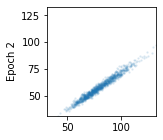

Reconstruction:


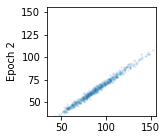

Epoch 3 elbo -11.933325


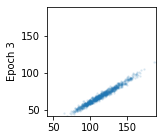

Reconstruction:


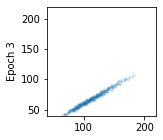

Epoch 4 elbo -11.305249


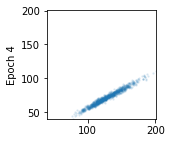

Reconstruction:


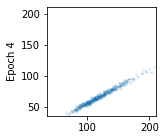

Epoch 5 elbo -10.974557


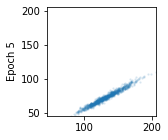

Reconstruction:


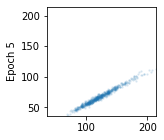

Epoch 6 elbo -11.445219


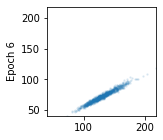

Reconstruction:


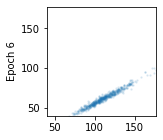

Epoch 7 elbo -11.086322


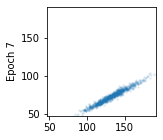

Reconstruction:


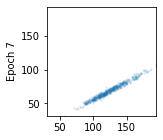

Epoch 8 elbo -11.084492


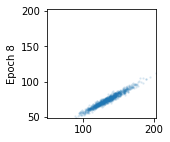

Reconstruction:


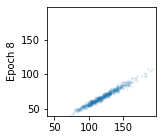

Epoch 9 elbo -11.021936


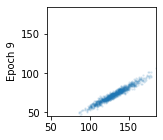

Reconstruction:


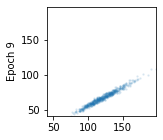

Epoch 10 elbo -11.206199


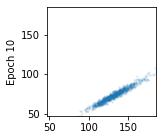

Reconstruction:


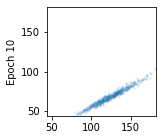

Epoch 11 elbo -11.033477


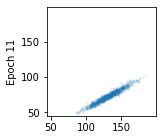

Reconstruction:


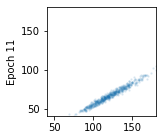

Epoch 12 elbo -14.135179


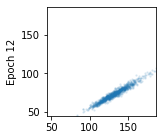

Reconstruction:


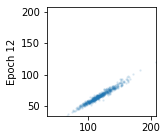

Epoch 13 elbo -10.995419


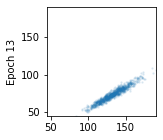

Reconstruction:


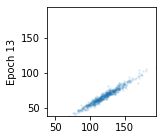

Epoch 14 elbo -11.072775


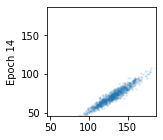

Reconstruction:


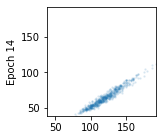

Epoch 15 elbo -11.0211115


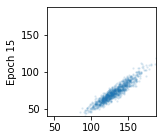

Reconstruction:


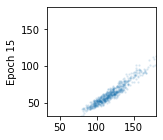

Epoch 16 elbo -10.772482


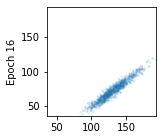

Reconstruction:


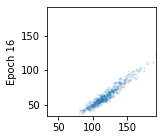

Epoch 17 elbo -10.853105


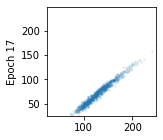

Reconstruction:


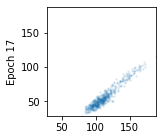

Epoch 18 elbo -10.353795


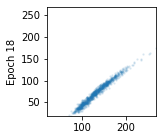

Reconstruction:


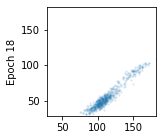

Epoch 19 elbo -10.417527


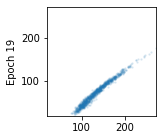

Reconstruction:


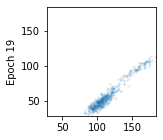

Epoch 20 elbo -10.34609


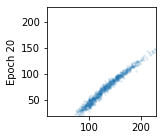

Reconstruction:


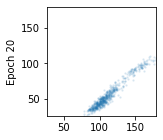

Epoch 21 elbo -10.453127


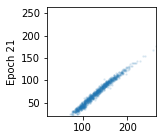

Reconstruction:


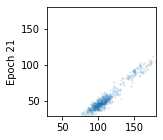

Epoch 22 elbo -10.215071


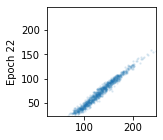

Reconstruction:


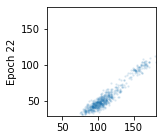

Epoch 23 elbo -10.176841


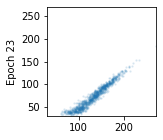

Reconstruction:


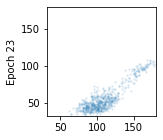

Epoch 24 elbo -10.143949


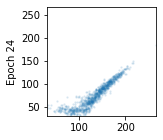

Reconstruction:


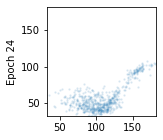

Epoch 25 elbo -10.109024


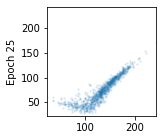

Reconstruction:


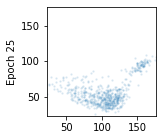

Epoch 26 elbo -9.97181


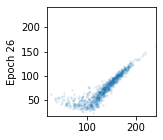

Reconstruction:


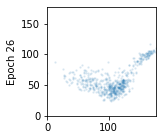

Epoch 27 elbo -10.438441


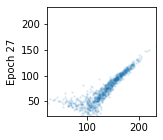

Reconstruction:


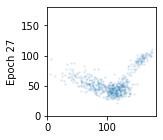

Epoch 28 elbo -10.018571


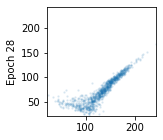

Reconstruction:


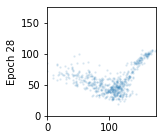

Epoch 29 elbo -9.938674


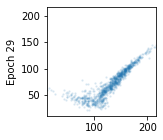

Reconstruction:


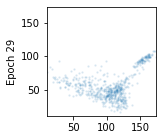

Epoch 30 elbo -9.985303


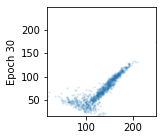

Reconstruction:


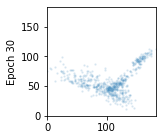

Epoch 31 elbo -9.800081


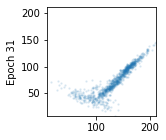

Reconstruction:


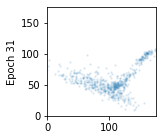

Epoch 32 elbo -9.889785


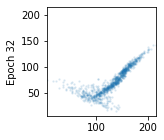

Reconstruction:


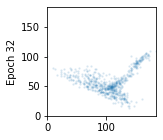

Epoch 33 elbo -9.9437065


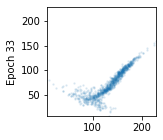

Reconstruction:


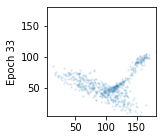

Epoch 34 elbo -9.853628


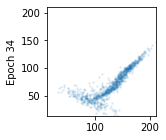

Reconstruction:


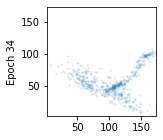

Epoch 35 elbo -9.976591


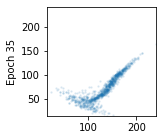

Reconstruction:


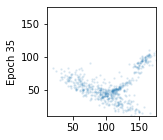

Epoch 36 elbo -9.9455


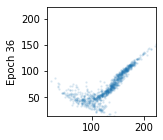

Reconstruction:


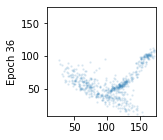

Epoch 37 elbo -9.738084


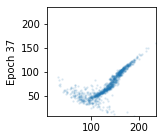

Reconstruction:


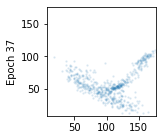

Epoch 38 elbo -9.913586


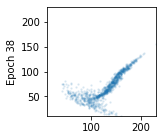

Reconstruction:


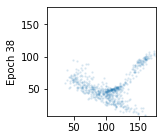

Epoch 39 elbo -9.645542


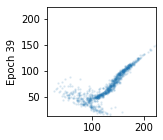

Reconstruction:


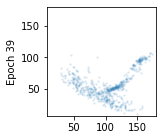

Epoch 40 elbo -9.726229


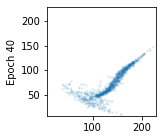

Reconstruction:


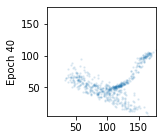

Epoch 41 elbo -9.671444


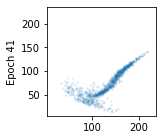

Reconstruction:


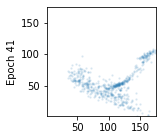

Epoch 42 elbo -9.71979


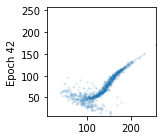

Reconstruction:


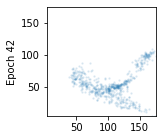

Epoch 43 elbo -9.53417


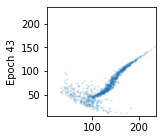

Reconstruction:


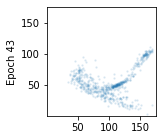

Epoch 44 elbo -9.652401


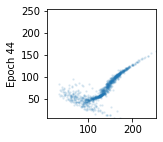

Reconstruction:


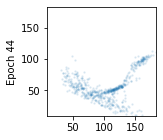

Epoch 45 elbo -9.723829


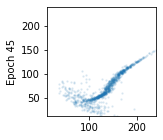

Reconstruction:


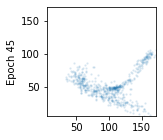

Epoch 46 elbo -9.584087


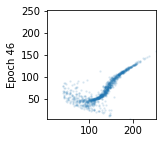

Reconstruction:


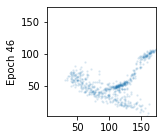

Epoch 47 elbo -9.6227045


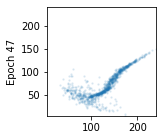

Reconstruction:


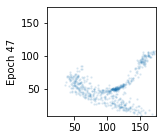

Epoch 48 elbo -9.613173


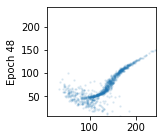

Reconstruction:


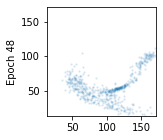

Epoch 49 elbo -9.803686


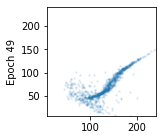

Reconstruction:


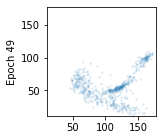

Epoch 50 elbo -9.572216


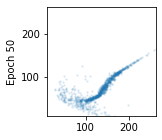

Reconstruction:


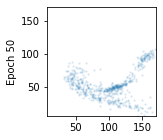

Epoch 51 elbo -9.573938


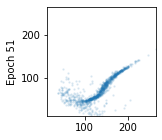

Reconstruction:


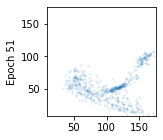

Epoch 52 elbo -9.526353


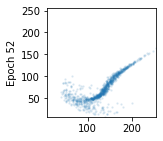

Reconstruction:


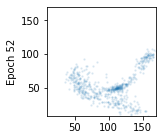

Epoch 53 elbo -9.58029


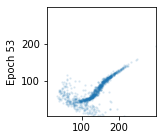

Reconstruction:


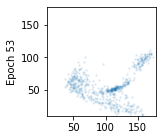

Epoch 54 elbo -9.422238


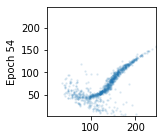

Reconstruction:


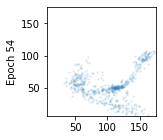

Epoch 55 elbo -9.616718


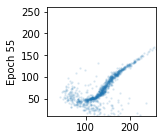

Reconstruction:


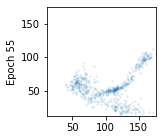

Epoch 56 elbo -9.631845


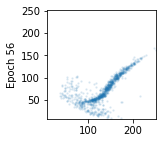

Reconstruction:


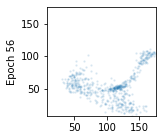

Epoch 57 elbo -9.578774


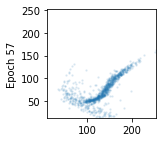

Reconstruction:


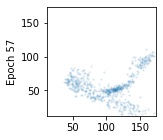

Epoch 58 elbo -9.756331


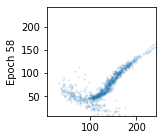

Reconstruction:


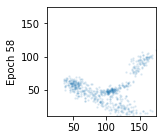

Epoch 59 elbo -9.564246


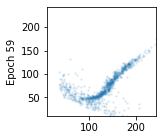

Reconstruction:


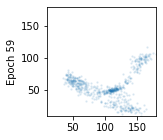

Epoch 60 elbo -9.590521


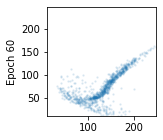

Reconstruction:


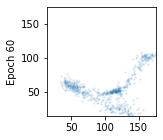

Epoch 61 elbo -9.461373


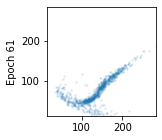

Reconstruction:


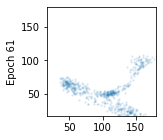

Epoch 62 elbo -9.408356


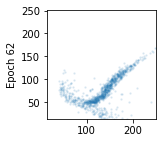

Reconstruction:


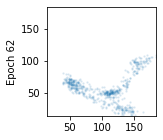

Epoch 63 elbo -9.39487


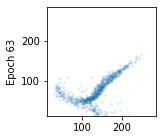

Reconstruction:


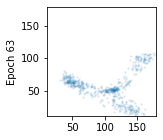

Epoch 64 elbo -9.398361


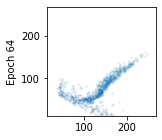

Reconstruction:


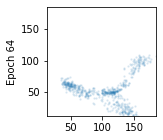

Epoch 65 elbo -9.491375


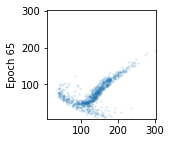

Reconstruction:


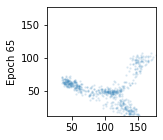

Epoch 66 elbo -9.285392


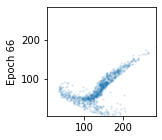

Reconstruction:


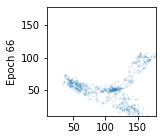

Epoch 67 elbo -9.285559


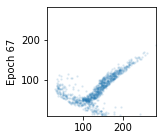

Reconstruction:


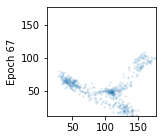

Epoch 68 elbo -9.4116745


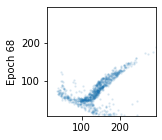

Reconstruction:


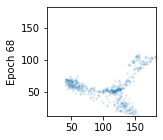

Epoch 69 elbo -9.309813


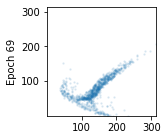

Reconstruction:


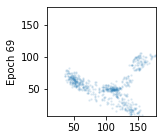

Epoch 70 elbo -9.495725


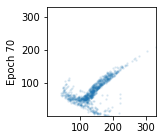

Reconstruction:


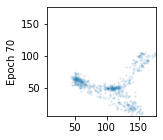

Epoch 71 elbo -9.255313


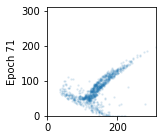

Reconstruction:


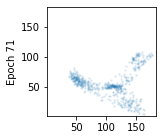

Epoch 72 elbo -9.316059


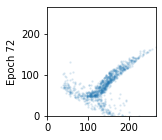

Reconstruction:


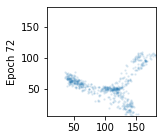

Epoch 73 elbo -9.306385


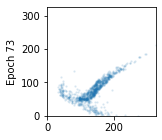

Reconstruction:


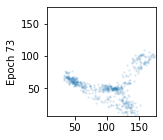

Epoch 74 elbo -9.224512


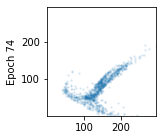

Reconstruction:


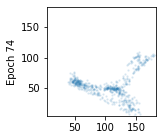

Epoch 75 elbo -9.335005


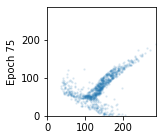

Reconstruction:


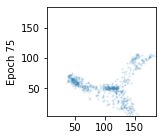

Epoch 76 elbo -9.225612


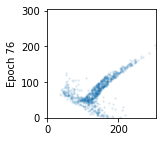

Reconstruction:


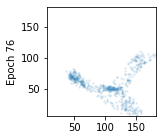

Epoch 77 elbo -9.408006


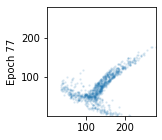

Reconstruction:


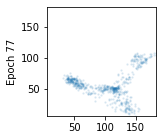

Epoch 78 elbo -9.3373995


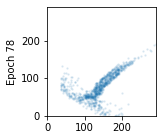

Reconstruction:


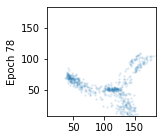

Epoch 79 elbo -9.17951


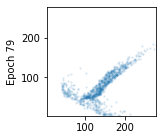

Reconstruction:


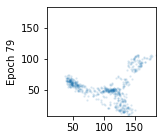

Epoch 80 elbo -9.238348


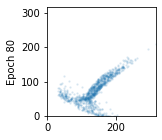

Reconstruction:


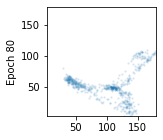

Epoch 81 elbo -9.358118


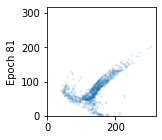

Reconstruction:


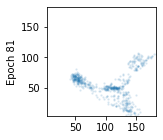

Epoch 82 elbo -9.159077


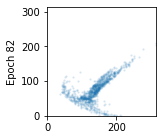

Reconstruction:


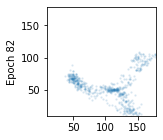

Epoch 83 elbo -9.247538


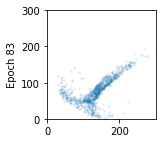

Reconstruction:


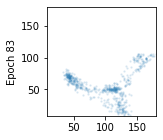

Epoch 84 elbo -9.226053


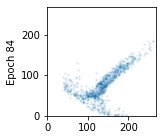

Reconstruction:


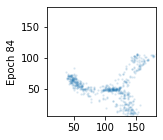

Epoch 85 elbo -9.0792675


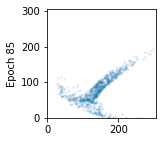

Reconstruction:


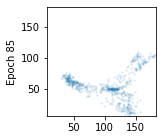

Epoch 86 elbo -9.20339


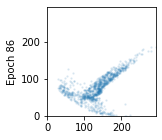

Reconstruction:


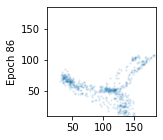

Epoch 87 elbo -9.324393


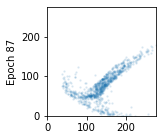

Reconstruction:


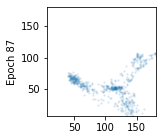

Epoch 88 elbo -9.067686


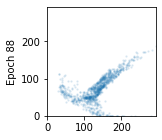

Reconstruction:


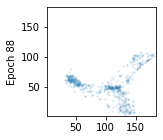

Epoch 89 elbo -9.313302


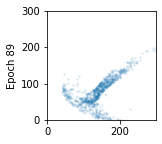

Reconstruction:


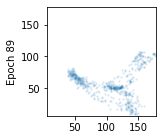

Epoch 90 elbo -9.181575


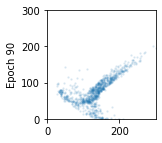

Reconstruction:


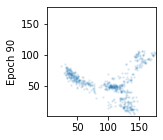

Epoch 91 elbo -9.201581


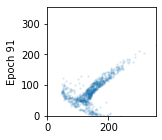

Reconstruction:


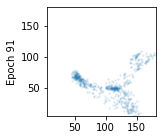

Epoch 92 elbo -9.154588


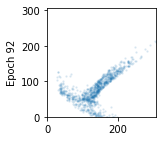

Reconstruction:


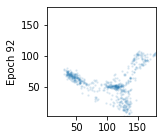

Epoch 93 elbo -9.144824


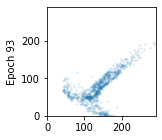

Reconstruction:


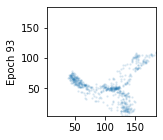

Epoch 94 elbo -9.0503025


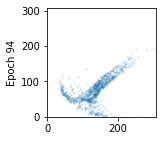

Reconstruction:


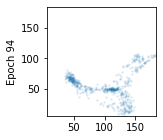

Epoch 95 elbo -9.20147


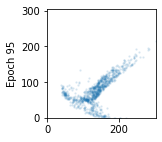

Reconstruction:


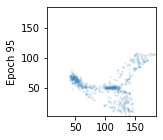

Epoch 96 elbo -9.08583


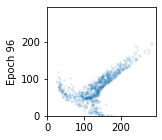

Reconstruction:


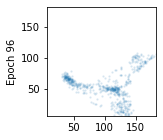

Epoch 97 elbo -9.131964


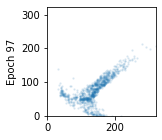

Reconstruction:


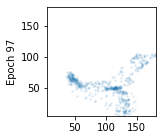

Epoch 98 elbo -9.153528


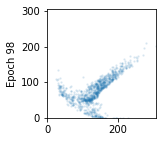

Reconstruction:


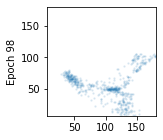

Epoch 99 elbo -9.178817


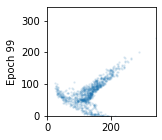

Reconstruction:


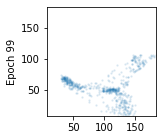

Epoch 100 elbo -9.0505295


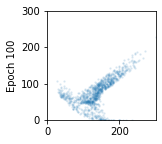

Reconstruction:


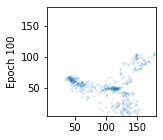

Epoch 101 elbo -9.111869


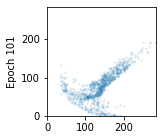

Reconstruction:


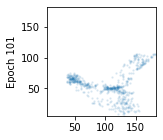

Epoch 102 elbo -9.092399


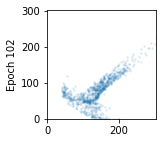

Reconstruction:


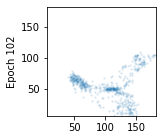

Epoch 103 elbo -9.074795


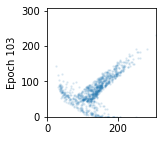

Reconstruction:


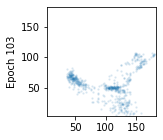

Epoch 104 elbo -9.138824


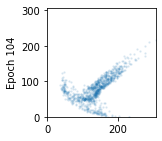

Reconstruction:


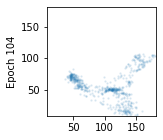

Epoch 105 elbo -9.0509405


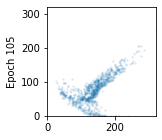

Reconstruction:


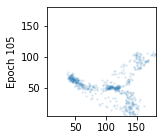

Epoch 106 elbo -9.081185


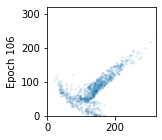

Reconstruction:


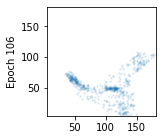

Epoch 107 elbo -9.039033


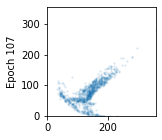

Reconstruction:


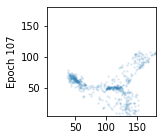

Epoch 108 elbo -9.08847


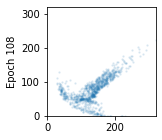

Reconstruction:


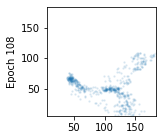

Epoch 109 elbo -9.116358


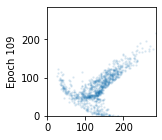

Reconstruction:


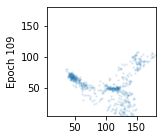

Epoch 110 elbo -9.166764


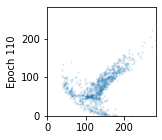

Reconstruction:


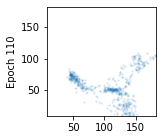

Epoch 111 elbo -9.039656


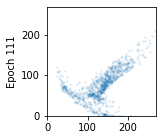

Reconstruction:


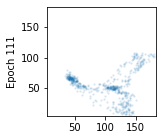

Epoch 112 elbo -9.0972395


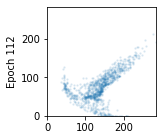

Reconstruction:


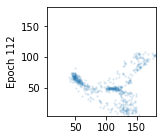

Epoch 113 elbo -9.012726


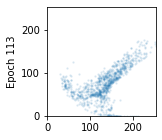

Reconstruction:


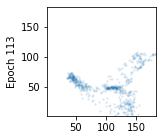

Epoch 114 elbo -9.130327


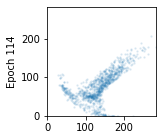

Reconstruction:


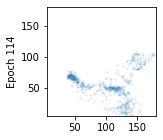

Epoch 115 elbo -8.95821


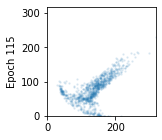

Reconstruction:


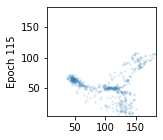

Epoch 116 elbo -9.059087


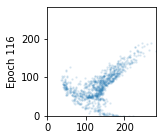

Reconstruction:


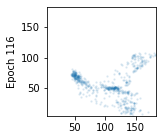

Epoch 117 elbo -8.964342


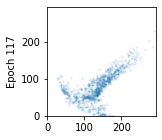

Reconstruction:


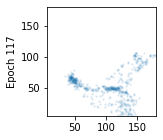

Epoch 118 elbo -9.129632


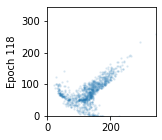

Reconstruction:


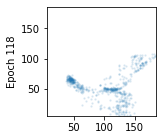

Epoch 119 elbo -9.019536


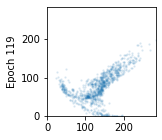

Reconstruction:


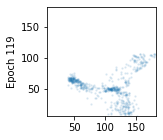

Epoch 120 elbo -9.018868


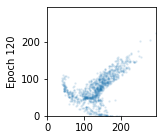

Reconstruction:


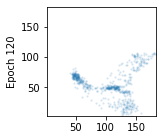

Epoch 121 elbo -9.097587


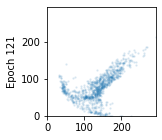

Reconstruction:


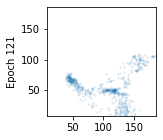

Epoch 122 elbo -9.121169


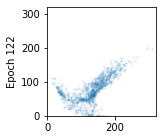

Reconstruction:


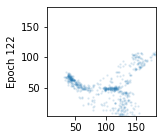

Epoch 123 elbo -8.884107


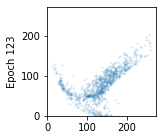

Reconstruction:


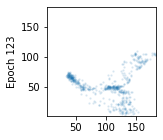

Epoch 124 elbo -9.11829


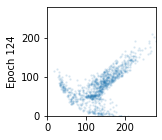

Reconstruction:


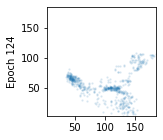

Epoch 125 elbo -9.021448


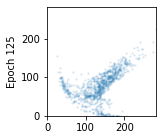

Reconstruction:


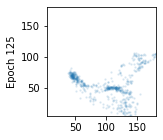

Epoch 126 elbo -8.969404


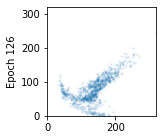

Reconstruction:


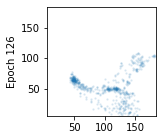

Epoch 127 elbo -8.98082


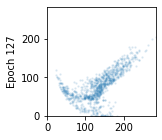

Reconstruction:


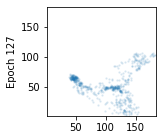

Epoch 128 elbo -9.000369


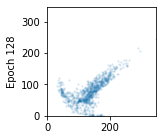

Reconstruction:


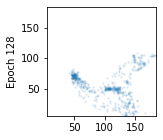

Epoch 129 elbo -9.050478


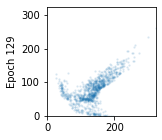

Reconstruction:


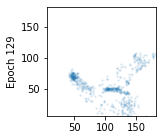

Epoch 130 elbo -9.010968


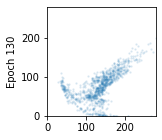

Reconstruction:


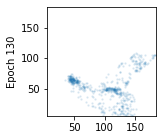

Epoch 131 elbo -9.007075


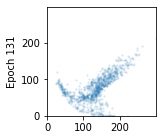

Reconstruction:


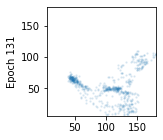

Epoch 132 elbo -8.866368


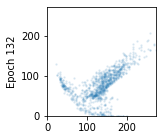

Reconstruction:


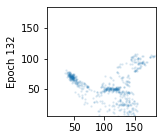

Epoch 133 elbo -8.95291


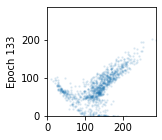

Reconstruction:


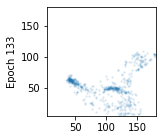

Epoch 134 elbo -8.872379


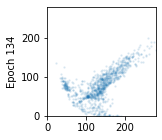

Reconstruction:


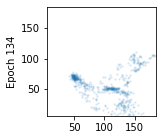

Epoch 135 elbo -8.923119


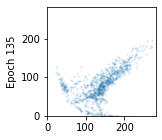

Reconstruction:


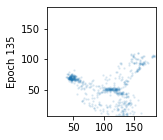

Epoch 136 elbo -8.837998


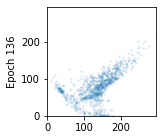

Reconstruction:


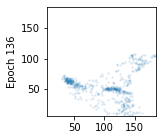

Epoch 137 elbo -9.011221


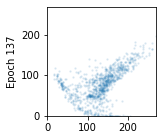

Reconstruction:


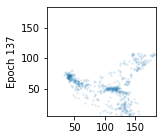

Epoch 138 elbo -8.862116


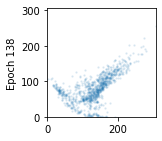

Reconstruction:


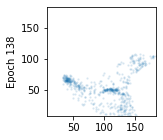

Epoch 139 elbo -8.985003


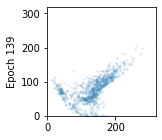

Reconstruction:


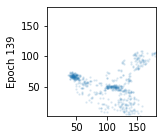

Epoch 140 elbo -8.867057


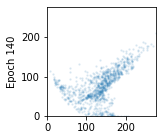

Reconstruction:


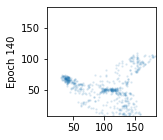

Epoch 141 elbo -8.799464


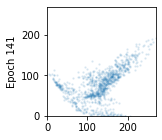

Reconstruction:


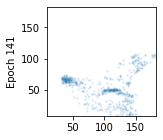

Epoch 142 elbo -8.986545


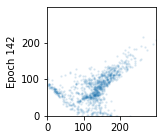

Reconstruction:


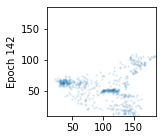

Epoch 143 elbo -8.975856


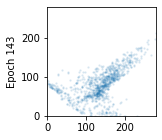

Reconstruction:


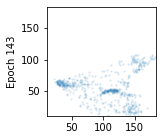

Epoch 144 elbo -8.808746


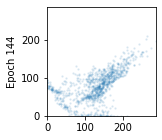

Reconstruction:


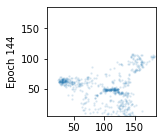

Epoch 145 elbo -8.745731


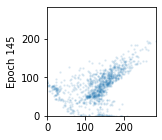

Reconstruction:


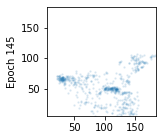

Epoch 146 elbo -8.791966


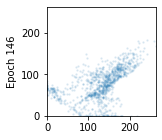

Reconstruction:


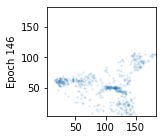

Epoch 147 elbo -9.132244


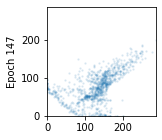

Reconstruction:


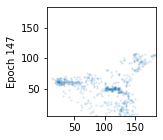

Epoch 148 elbo -8.767093


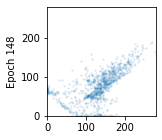

Reconstruction:


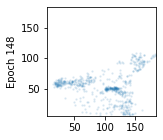

Epoch 149 elbo -8.8792515


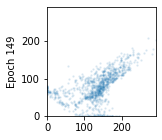

Reconstruction:


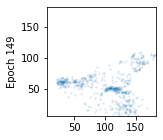

Epoch 150 elbo -9.026331


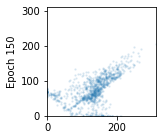

Reconstruction:


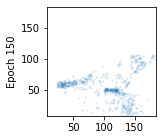

Epoch 151 elbo -8.79421


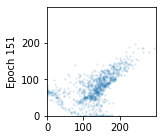

Reconstruction:


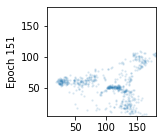

Epoch 152 elbo -8.8446455


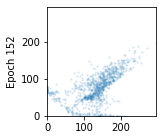

Reconstruction:


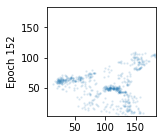

Epoch 153 elbo -8.763921


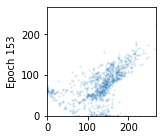

Reconstruction:


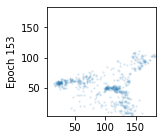

Epoch 154 elbo -8.795174


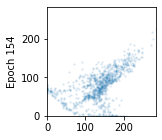

Reconstruction:


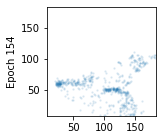

Epoch 155 elbo -8.646754


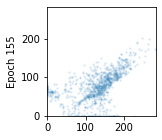

Reconstruction:


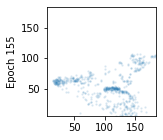

Epoch 156 elbo -8.674614


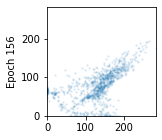

Reconstruction:


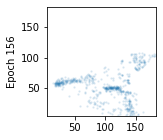

Epoch 157 elbo -8.700165


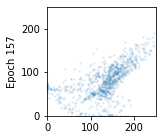

Reconstruction:


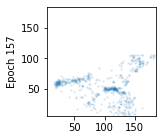

Epoch 158 elbo -8.836556


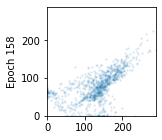

Reconstruction:


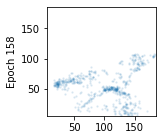

Epoch 159 elbo -8.735012


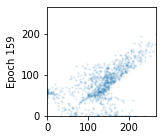

Reconstruction:


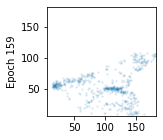

Epoch 160 elbo -8.661657


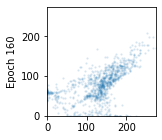

Reconstruction:


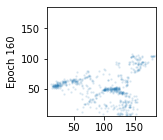

Epoch 161 elbo -8.851081


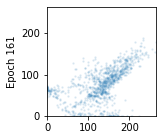

Reconstruction:


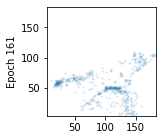

Epoch 162 elbo -8.652931


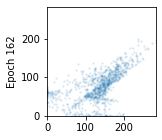

Reconstruction:


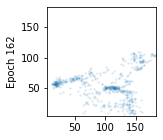

Epoch 163 elbo -8.603663


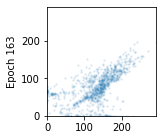

Reconstruction:


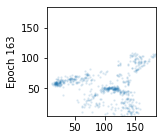

Epoch 164 elbo -8.632388


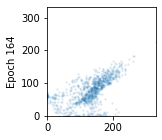

Reconstruction:


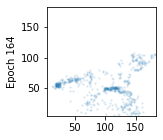

Epoch 165 elbo -8.710664


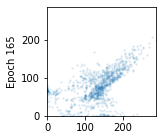

Reconstruction:


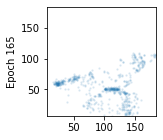

Epoch 166 elbo -8.620255


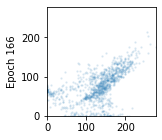

Reconstruction:


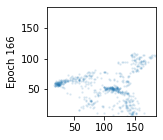

Epoch 167 elbo -8.600827


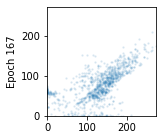

Reconstruction:


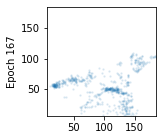

Epoch 168 elbo -8.552401


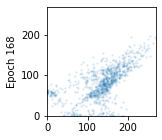

Reconstruction:


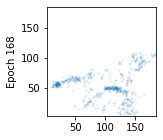

Epoch 169 elbo -8.797808


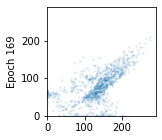

Reconstruction:


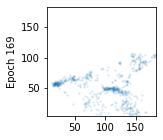

Epoch 170 elbo -8.568865


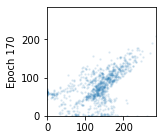

Reconstruction:


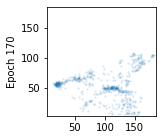

Epoch 171 elbo -8.5918455


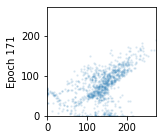

Reconstruction:


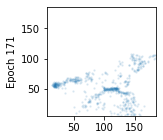

Epoch 172 elbo -8.752078


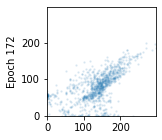

Reconstruction:


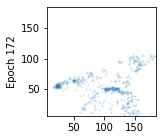

Epoch 173 elbo -8.534738


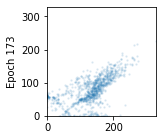

Reconstruction:


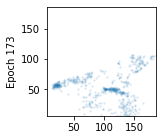

Epoch 174 elbo -8.5530205


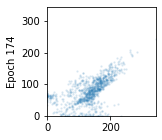

Reconstruction:


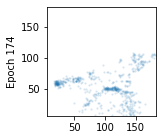

Epoch 175 elbo -8.62578


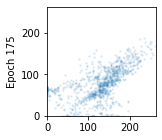

Reconstruction:


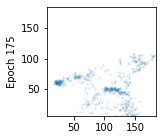

Epoch 176 elbo -8.700643


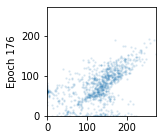

Reconstruction:


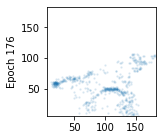

Epoch 177 elbo -8.530448


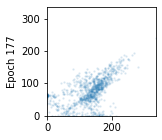

Reconstruction:


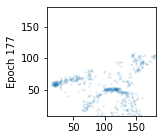

Epoch 178 elbo -8.636698


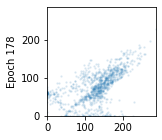

Reconstruction:


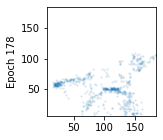

Epoch 179 elbo -8.56697


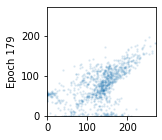

Reconstruction:


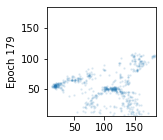

Epoch 180 elbo -8.563387


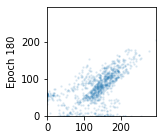

Reconstruction:


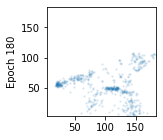

Epoch 181 elbo -8.598532


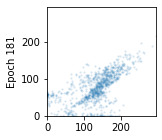

Reconstruction:


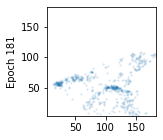

Epoch 182 elbo -8.643642


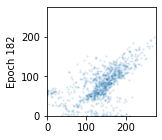

Reconstruction:


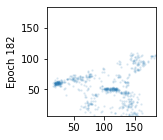

Epoch 183 elbo -8.76456


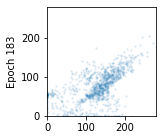

Reconstruction:


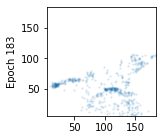

Epoch 184 elbo -8.638736


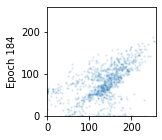

Reconstruction:


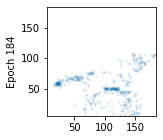

Epoch 185 elbo -8.511716


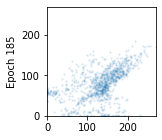

Reconstruction:


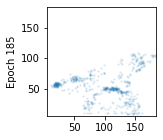

Epoch 186 elbo -8.610353


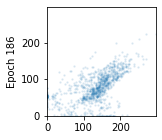

Reconstruction:


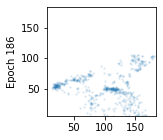

Epoch 187 elbo -8.611694


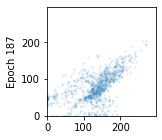

Reconstruction:


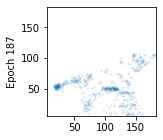

Epoch 188 elbo -8.647715


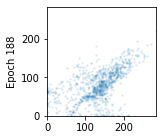

Reconstruction:


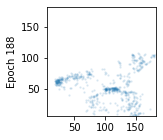

Epoch 189 elbo -8.616737


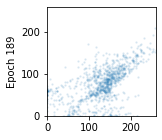

Reconstruction:


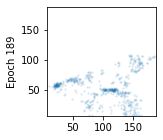

Epoch 190 elbo -8.5204


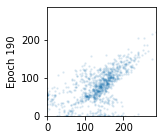

Reconstruction:


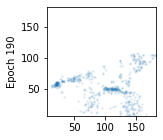

Epoch 191 elbo -8.649592


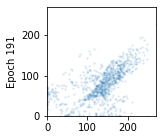

Reconstruction:


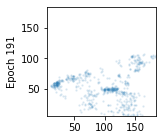

Epoch 192 elbo -8.526436


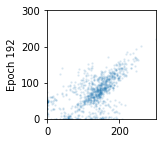

Reconstruction:


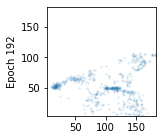

Epoch 193 elbo -8.564411


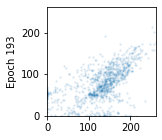

Reconstruction:


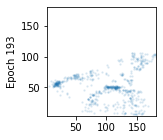

Epoch 194 elbo -8.54027


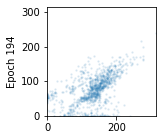

Reconstruction:


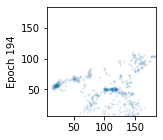

Epoch 195 elbo -8.501871


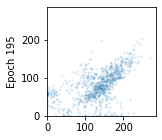

Reconstruction:


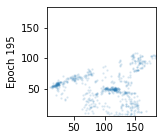

Epoch 196 elbo -8.496241


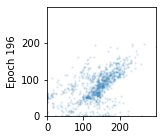

Reconstruction:


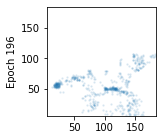

Epoch 197 elbo -8.505767


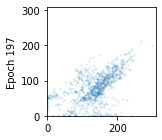

Reconstruction:


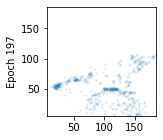

Epoch 198 elbo -8.541673


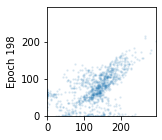

Reconstruction:


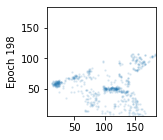

Epoch 199 elbo -8.429709


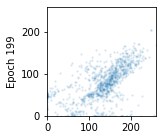

Reconstruction:


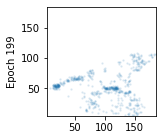

Epoch 200 elbo -8.701185


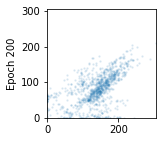

Reconstruction:


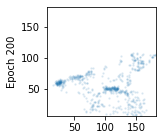

Epoch 201 elbo -8.495582


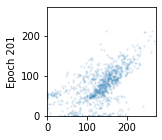

Reconstruction:


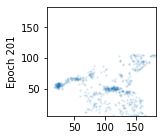

Epoch 202 elbo -8.500436


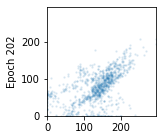

Reconstruction:


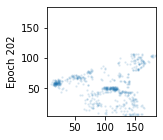

Epoch 203 elbo -8.542533


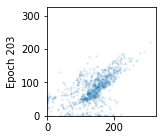

Reconstruction:


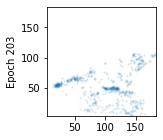

Epoch 204 elbo -8.722705


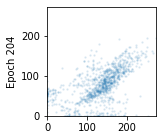

Reconstruction:


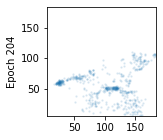

Epoch 205 elbo -8.43829


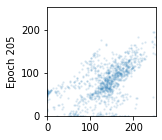

Reconstruction:


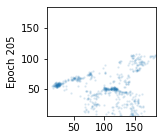

Epoch 206 elbo -8.447793


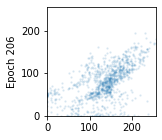

Reconstruction:


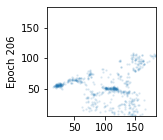

Epoch 207 elbo -8.572257


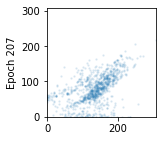

Reconstruction:


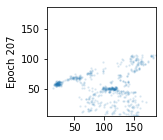

Epoch 208 elbo -8.538183


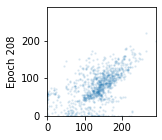

Reconstruction:


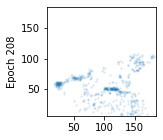

Epoch 209 elbo -8.4136915


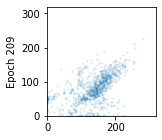

Reconstruction:


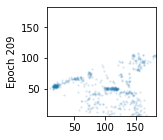

Epoch 210 elbo -8.42111


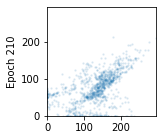

Reconstruction:


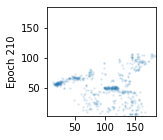

Epoch 211 elbo -8.444339


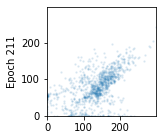

Reconstruction:


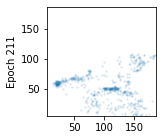

Epoch 212 elbo -8.44598


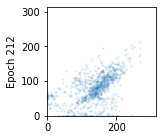

Reconstruction:


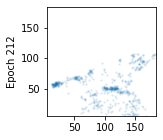

Epoch 213 elbo -8.415297


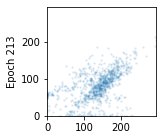

Reconstruction:


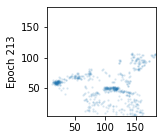

Epoch 214 elbo -8.4545965


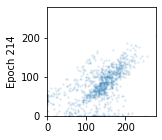

Reconstruction:


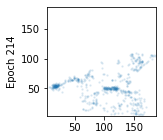

Epoch 215 elbo -8.463796


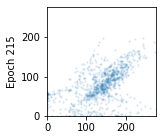

Reconstruction:


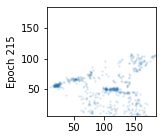

Epoch 216 elbo -8.370845


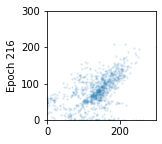

Reconstruction:


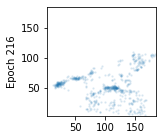

Epoch 217 elbo -8.409438


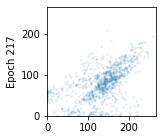

Reconstruction:


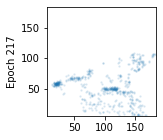

Epoch 218 elbo -8.523901


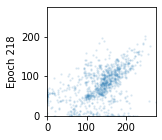

Reconstruction:


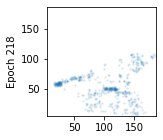

Epoch 219 elbo -8.5011215


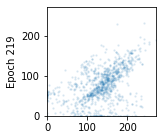

Reconstruction:


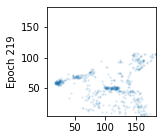

Epoch 220 elbo -8.466946


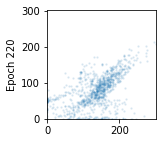

Reconstruction:


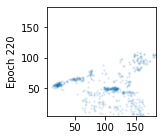

Epoch 221 elbo -8.515973


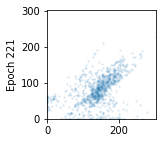

Reconstruction:


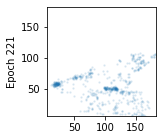

Epoch 222 elbo -8.414744


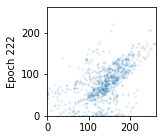

Reconstruction:


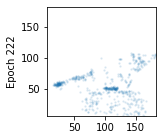

Epoch 223 elbo -8.58904


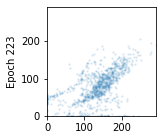

Reconstruction:


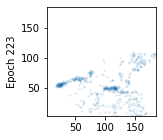

Epoch 224 elbo -8.482675


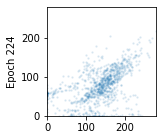

Reconstruction:


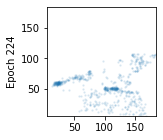

Epoch 225 elbo -8.4026375


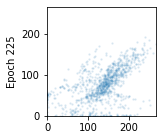

Reconstruction:


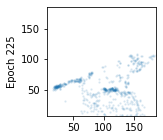

KeyboardInterrupt: 

In [6]:
samples, _ = make_decoder(prior.sample(1000), [2])
s1_5k, _ = make_decoder(prior.sample(1500), [2])
s2k, _ = make_decoder(prior.sample(2000), [2])
s3k, _ = make_decoder(prior.sample(3000), [2])
s5k, _ = make_decoder(prior.sample(5000), [2])
s10k, _ = make_decoder(prior.sample(10000), [2])

t1_5k = None
t2k = None
t3k = None
t5k = None
t10k = None

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(5000):
        test_elbo, test_codes, test_samples, test_loc, t1_5k, t2k, t3k, t5k, t10k = sess.run([elbo, code, samples, loc, s1_5k, s2k, s3k, s5k, s10k], {data: X_test})
        print('Epoch', epoch, 'elbo', test_elbo)
        plot(epoch, test_samples, size=2)
        print('Reconstruction:')
        plot(epoch, test_loc, size=2)
        for _ in range(600):
            indices = np.random.choice(X_train.shape[0], 128)
            batch = X_train[indices]
            sess.run(optimize, {data: batch})

In [7]:
def people_in_area(samples):
    in_area = []
    for sample in samples:
        x = sample[0]
        y = sample[1]
        if x > 130 and x < 150 and y > 50 and y < 70: in_area.append(sample)
    print(len(in_area))

people_in_area(test_samples)
people_in_area(t1_5k)
people_in_area(t2k)
people_in_area(t3k)
people_in_area(t5k)
people_in_area(t10k)

59
84
106
153
275
504
